# Amazon Alexa Reviews

![](https://images.unsplash.com/photo-1512446733611-9099a758e5e5?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1350&q=80)

## Importing Data 

In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [465]:
df_alexa = pd.read_csv("amazon_alexa.tsv", sep="\t")

In [466]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [467]:
df_alexa.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [519]:
df_alexa["verified_reviews"].head(20)

0                                         Love my Echo!
1                                             Loved it!
2     Sometimes while playing a game, you can answer...
3     I have had a lot of fun with this thing. My 4 ...
4                                                 Music
5     I received the echo as a gift. I needed anothe...
6     Without having a cellphone, I cannot use many ...
7     I think this is the 5th one I've purchased. I'...
8                                           looks great
9     Love it! I’ve listened to songs I haven’t hear...
10    I sent it to my 85 year old Dad, and he talks ...
11    I love it! Learning knew things with it eveyda...
12    I purchased this for my mother who is having k...
13                                   Love, Love, Love!!
14                             Just what I expected....
15                            I love it, wife hates it.
16    Really happy with this purchase.  Great speake...
17    We have only been using Alexa for a couple

In [469]:
df_alexa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [470]:
df_alexa["variation"].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

## Exploratory Data Analysis

In [471]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

df_alexa["cleaned_reviews"] = df_alexa.verified_reviews.apply(lambda x: word_tokenize(x))

df_alexa["cleaned_reviews"] = df_alexa.cleaned_reviews.apply(lambda x: [w for w in x if w not in stop_words])

df_alexa["cleaned_reviews"] = df_alexa.cleaned_reviews.apply(lambda x: " ".join(x))

In [472]:
positive = df_alexa[df_alexa["feedback"]==1]
negative = df_alexa[df_alexa["feedback"]==0]

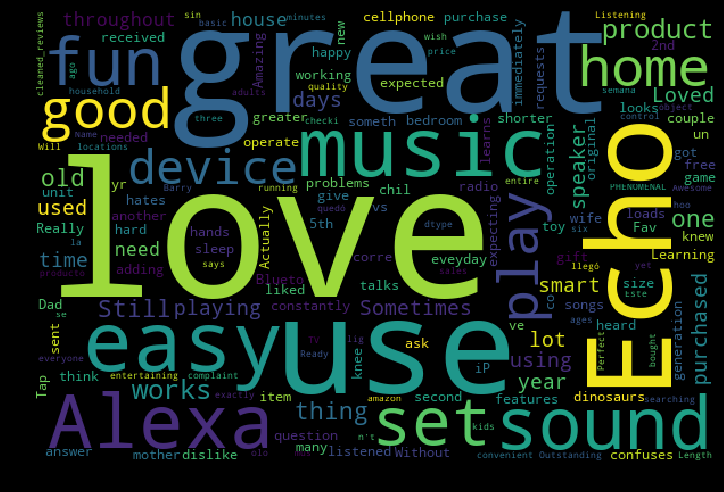

In [473]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# Generate a word cloud image
positive_wordcloud = WordCloud(width=600, height=400).generate(str(positive["cleaned_reviews"]))
#Positive Word cloud
plt.figure(figsize=(10,8), facecolor='black')
plt.imshow(positive_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

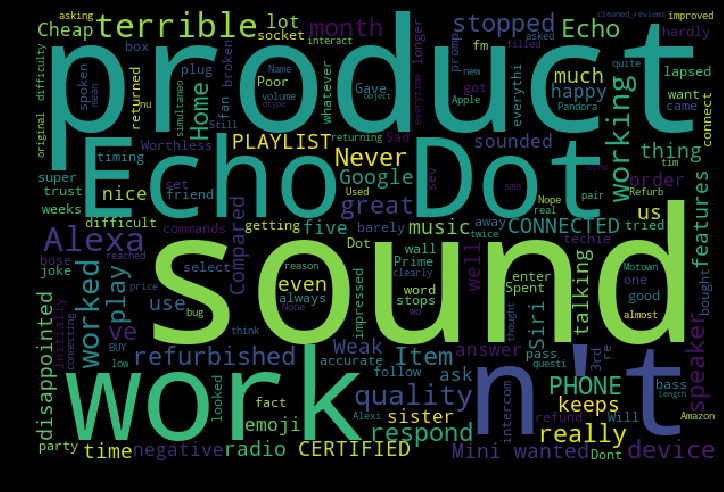

In [474]:
# Generate a word cloud image
negative_wordcloud = WordCloud(width=600, height=400).generate(str(negative["cleaned_reviews"]))
#Negative Word cloud
plt.figure(figsize=(10,8), facecolor='black')
plt.imshow(negative_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

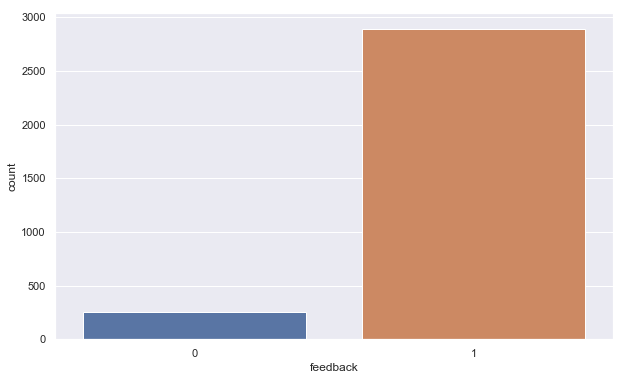

In [475]:
plt.figure(figsize=(10,6))
sns.countplot(df_alexa["feedback"], label="Count");

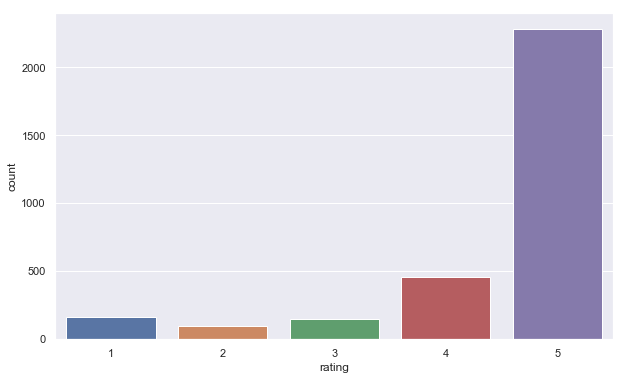

In [476]:
plt.figure(figsize=(10,6))
sns.countplot(df_alexa["rating"]);

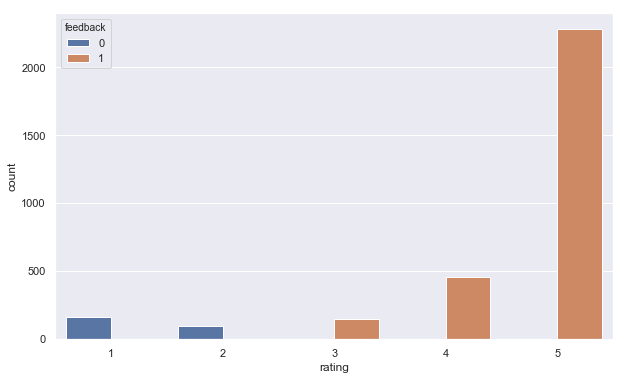

In [477]:
plt.figure(figsize=(10,6))
sns.countplot(x="rating", hue="feedback", data=data)
plt.show()

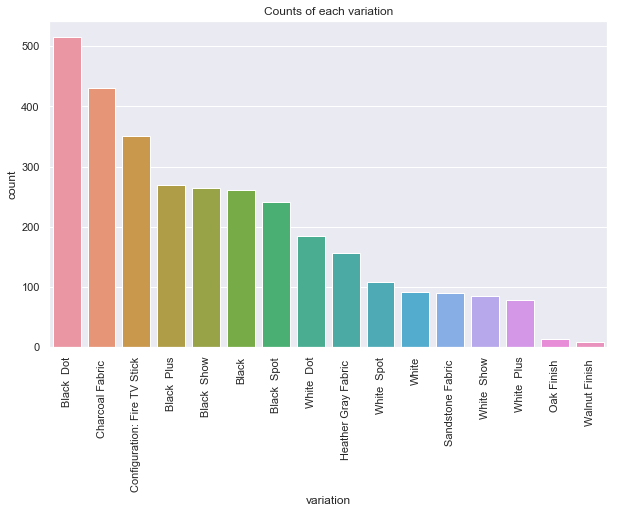

In [478]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(df_alexa.variation,
              order = df_alexa["variation"].value_counts().index)
plt.xticks(rotation=90)
plt.title('Counts of each variation');

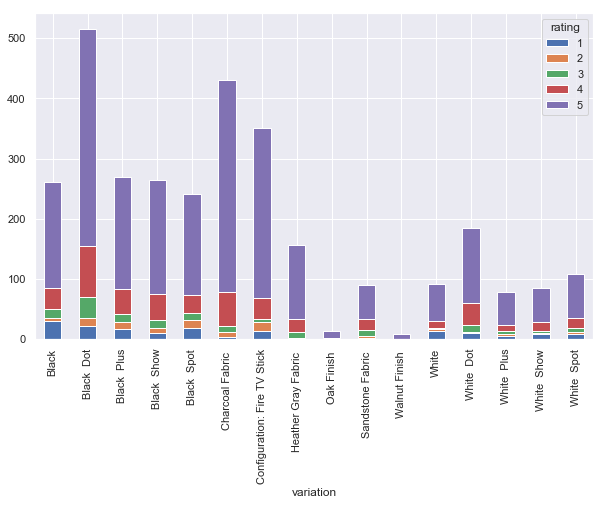

In [479]:
df_alexa.groupby(["variation", "rating"]).rating.count().unstack().plot(kind="bar", stacked=True);

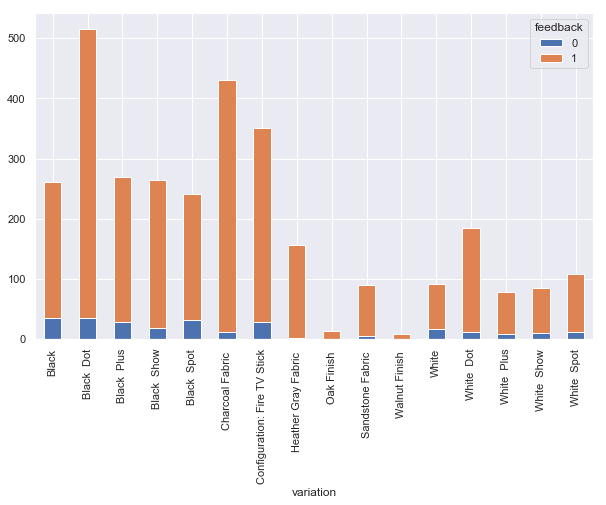

In [480]:
df_alexa.groupby(["variation", "feedback"]).rating.count().unstack().plot(kind="bar", stacked=True);

## Feature Engineering

### Extracting Year, Month, Day of the Week from date

In [481]:
df_alexa["datetime"] = pd.to_datetime(df_alexa.date)
df_alexa.head()

,rating,date,variation,verified_reviews,feedback,cleaned_reviews,datetime
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love Echo !,2018-07-31
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved !,2018-07-31
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"Sometimes playing game , answer question corre...",2018-07-31
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I lot fun thing . My 4 yr old learns dinosaurs...,2018-07-31
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music,2018-07-31


In [482]:
df_alexa["year"] = df_alexa.datetime.dt.year

In [483]:
df_alexa["month"] = df_alexa.datetime.dt.month

In [484]:
df_alexa["day_of_week"] = df_alexa.datetime.dt.dayofweek

In [485]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback,cleaned_reviews,datetime,year,month,day_of_week
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love Echo !,2018-07-31,2018,7,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved !,2018-07-31,2018,7,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"Sometimes playing game , answer question corre...",2018-07-31,2018,7,1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I lot fun thing . My 4 yr old learns dinosaurs...,2018-07-31,2018,7,1
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music,2018-07-31,2018,7,1


### Estimating length of the reviews
Calculating the length of text proves to be an important feature for classifying text in a Natural Language Processing problem.

In [486]:
df_alexa["len_of_reviews"] = df_alexa["verified_reviews"].apply(len)

In [487]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback,cleaned_reviews,datetime,year,month,day_of_week,len_of_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love Echo !,2018-07-31,2018,7,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved !,2018-07-31,2018,7,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"Sometimes playing game , answer question corre...",2018-07-31,2018,7,1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I lot fun thing . My 4 yr old learns dinosaurs...,2018-07-31,2018,7,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music,2018-07-31,2018,7,1,5


## Data Preprocessing

In [488]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [489]:
tfidf = TfidfVectorizer(stop_words = "english")

In [490]:
tfidf_data = pd.DataFrame(tfidf.fit_transform(df_alexa["cleaned_reviews"]).toarray())

### One Hot Encoding

In [491]:
one_hot_data = pd.get_dummies(df_alexa["variation"])

In [492]:
X = pd.concat([df_alexa["rating"], one_hot_data, tfidf_data, df_alexa["month"], df_alexa["day_of_week"], df_alexa['len_of_reviews']], axis=1)

In [493]:
X.head()

,rating,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,3770,3771,3772,3773,3774,3775,3776,month,day_of_week,len_of_reviews
0,5,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1,13
1,5,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1,9
2,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1,195
3,5,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1,172
4,5,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1,5


In [494]:
y = df_alexa["feedback"]

In [495]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: feedback, dtype: int64

In [496]:
from sklearn.model_selection import train_test_split

In [497]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [498]:
X_train.shape, X_test.shape

((2205, 3797), (945, 3797))

In [499]:
y_train.shape, y_test.shape

((2205,), (945,))

## RandomForestClassifier

## Model Building

In [500]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion="entropy")
rf_model = rf.fit(X_train, y_train)

In [501]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [502]:
feature_importances = pd.DataFrame(rf_model.feature_importances_, index = X_train.columns, 
                                   columns=["importance"]).sort_values("importance", ascending=False)

In [503]:
feature_importances.head(10)

,importance
rating,0.379558
len_of_reviews,0.019248
2025,0.018659
1494,0.011786
3730,0.007672
1092,0.007585
3217,0.007373
3360,0.006926
day_of_week,0.006529
3726,0.006386


## Evaluating Results

In [504]:
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

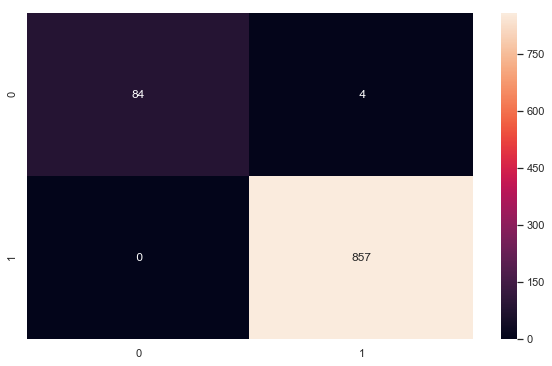

In [505]:
sns.heatmap(cm, annot=True, fmt="2.0f");

In [506]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        88
           1       1.00      1.00      1.00       857

   micro avg       1.00      1.00      1.00       945
   macro avg       1.00      0.98      0.99       945
weighted avg       1.00      1.00      1.00       945



## Gradient Boosting Classifier

## Model Building

In [507]:
from sklearn.ensemble import GradientBoostingClassifier

In [508]:
gbc = GradientBoostingClassifier()

In [509]:
model_gbc = gbc.fit(X_train, y_train)

In [510]:
model_gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

## Evaluating Results

In [511]:
y_pred = model_gbc.predict(X_test)

In [512]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

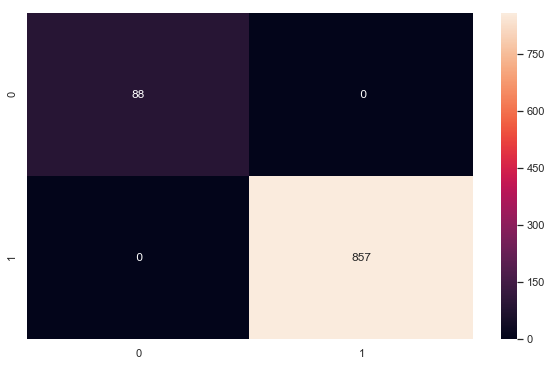

In [513]:
sns.heatmap(cm, annot=True, fmt="2.0f");

In [514]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00       857

   micro avg       1.00      1.00      1.00       945
   macro avg       1.00      1.00      1.00       945
weighted avg       1.00      1.00      1.00       945



## Formatting Final Results

In [515]:
results = pd.DataFrame(data = {"feedback": y_test, "predicted_results": y_pred})

In [516]:
results.head(10)

,feedback,predicted_results
2403,1,1
2665,0,0
2832,1,1
1842,1,1
302,1,1
1432,1,1
2656,1,1
1425,1,1
2541,0,0
2115,1,1
